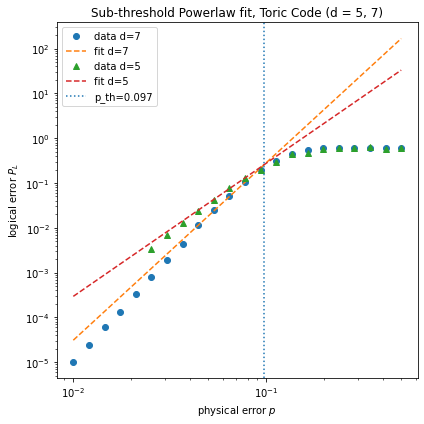

In [1]:
### Demonstrated Error Correcting Ability of Toric Code Implementation

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# ----------- DATA: only d = 5 and 7 ---------------------------------
p_vals = np.geomspace(0.010, 0.50, 22)

P_d7 = np.array([1.02e-05, 2.44e-05, 6.24e-05, 0.0001306,
                 0.0003368413110268035, 0.0007887996756455734,
                 0.0019319527598911151, 0.004422587036512878,
                 0.011804842346330465, 0.024788676532559926,
                 0.05215395848544904, 0.10292301358583779,
                 0.19952114924181963, 0.3094059405940594,
                 0.436871996505024, 0.5434782608695652,
                 0.5980861244019139, 0.6031363088057901,
                 0.6157635467980296, 0.6086427267194157,
                 0.6056935190793459, 0.5941770647653001])

P_d5 = np.array([0, 0, 0, 0, 0, 0.0034295,
                 0.00706889, 0.01303314, 0.02381945, 0.04140358,
                 0.0772499,  0.12995452, 0.19111323, 0.29895366,
                 0.43956044, 0.47505938, 0.58055152, 0.60606061,
                 0.58910162, 0.625, 0.58737151, 0.61068702])

# ------- select sub‑threshold region p<=0.08 and non‑zero ------------
p_cut = 0.08
eps    = 1e-12

d_list, p_list, P_list = [], [], []
for d, P in [(7, P_d7), (5, P_d5)]:
    mask = (P > 0) & (p_vals <= p_cut)
    d_list.append(np.full(mask.sum(), d))
    p_list.append(p_vals[mask])
    P_list.append(np.clip(P[mask], eps, 1.0))

d_fit = np.concatenate(d_list)
p_fit = np.concatenate(p_list)
P_fit = np.concatenate(P_list)

# ------------- power‑law model (with α and d+1 exponent) -------------
def P_model(xdata, p_th, beta, alpha):
    p_vec, d_vec = xdata
    return alpha * (p_vec / p_th)**(beta * (d_vec + 1))

# initial guesses & bounds
init   = (0.10, 0.50, 1e-3)
bounds = ((0.02, 0.05, 1e-6), (0.20, 2.0, 1.0))

popt, pcov = curve_fit(P_model, (p_fit, d_fit), P_fit,
                       p0=init, bounds=bounds, maxfev=50000)
p_th_hat, beta_hat, alpha_hat = popt

# ------------- plot ---------------------------------------------------
plt.figure(figsize=(6,6))
for d,P,mkr in [(7,P_d7,'o'), (5,P_d5,'^')]:
    mask = P>0
    plt.loglog(p_vals[mask], P[mask], mkr, label=f'data d={d}')
    plt.loglog(p_vals, P_model((p_vals, np.full_like(p_vals,d)), *popt),
               '--', label=f'fit d={d}')
plt.axvline(p_th_hat, linestyle=':', label=f'p_th={p_th_hat:.3f}')
plt.xlabel('physical error $p$')
plt.ylabel('logical error $P_L$')
plt.title('Sub‑threshold Powerlaw fit, Toric Code (d = 5, 7)')
plt.legend()
plt.tight_layout()
plt.show()


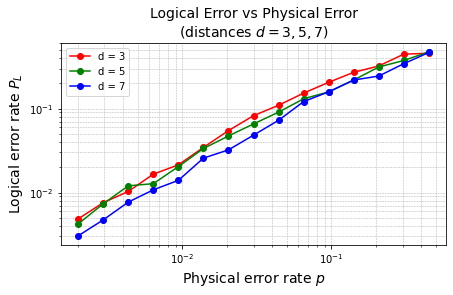

In [2]:
# data
px_range = np.geomspace(0.002, 0.45, 15)
results = np.array([
    [0.00485755, 0.00756630, 0.01031034, 0.01655629, 0.02137894, 0.03447681,
     0.05470460, 0.08240626, 0.10952903, 0.15302219, 0.20576132, 0.27063599,
     0.32206119, 0.44543430, 0.45662100],
    [0.00422610, 0.00734835, 0.01201706, 0.01275836, 0.02036867, 0.03350084,
     0.04720321, 0.06565988, 0.09070295, 0.13106160, 0.15810277, 0.21905805,
     0.31298905, 0.37453184, 0.47505938],
    [0.00305018, 0.00472389, 0.00769497, 0.01077122, 0.01397819, 0.02569043,
     0.03223207, 0.04827420, 0.07259528, 0.12113870, 0.15835313, 0.21905805,
     0.24420024, 0.34305317, 0.46620047]
])

colors = ['r', 'g', 'b']
dists = [3, 5, 7]

fig, ax = plt.subplots(figsize=(6.4, 4.2))

for i, (d, col) in enumerate(zip(dists, colors)):
    ax.loglog(px_range, results[i], 'o-', color=col, label=f'd = {d}')

ax.set_xlabel('Physical error rate $p$', fontsize = 14)
ax.set_ylabel('Logical error rate $P_L$', fontsize = 14)
ax.set_title('Logical Error vs Physical Error\n(distances $d=3,5,7$)', fontsize =14)
ax.grid(True, which='both', ls='--', lw=0.5)
ax.legend()
plt.tight_layout()
plt.show()